In [ ]:
Step 1 : Problem Statement
predict the right group of the new customers. [95%]

## Step 2 : Data Gathering

### Import All Libraries

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,roc_auc_score,roc_curve

In [4]:
df = pd.read_csv("train.csv")
df

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation
0,462809,Male,No,22,No,Healthcare,1.0,Low,4.0,Cat_4,D
1,462643,Female,Yes,38,Yes,Engineer,NaN,Average,3.0,Cat_4,A
2,466315,Female,Yes,67,Yes,Engineer,1.0,Low,1.0,Cat_6,B
3,461735,Male,Yes,67,Yes,Lawyer,0.0,High,2.0,Cat_6,B
4,462669,Female,Yes,40,Yes,Entertainment,NaN,High,6.0,Cat_6,A
...,...,...,...,...,...,...,...,...,...,...,...
8063,464018,Male,No,22,No,NaN,0.0,Low,7.0,Cat_1,D
8064,464685,Male,No,35,No,Executive,3.0,Low,4.0,Cat_4,D
8065,465406,Female,No,33,Yes,Healthcare,1.0,Low,1.0,Cat_6,D
8066,467299,Female,No,27,Yes,Healthcare,1.0,Low,4.0,Cat_6,B


# step 3 EDA

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8068 entries, 0 to 8067
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID               8068 non-null   int64  
 1   Gender           8068 non-null   object 
 2   Ever_Married     7928 non-null   object 
 3   Age              8068 non-null   int64  
 4   Graduated        7990 non-null   object 
 5   Profession       7944 non-null   object 
 6   Work_Experience  7239 non-null   float64
 7   Spending_Score   8068 non-null   object 
 8   Family_Size      7733 non-null   float64
 9   Var_1            7992 non-null   object 
 10  Segmentation     8068 non-null   object 
dtypes: float64(2), int64(2), object(7)
memory usage: 693.5+ KB


In [7]:
df.drop("ID",axis=1,inplace=True)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8068 entries, 0 to 8067
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Gender           8068 non-null   object 
 1   Ever_Married     7928 non-null   object 
 2   Age              8068 non-null   int64  
 3   Graduated        7990 non-null   object 
 4   Profession       7944 non-null   object 
 5   Work_Experience  7239 non-null   float64
 6   Spending_Score   8068 non-null   object 
 7   Family_Size      7733 non-null   float64
 8   Var_1            7992 non-null   object 
 9   Segmentation     8068 non-null   object 
dtypes: float64(2), int64(1), object(7)
memory usage: 630.4+ KB


In [9]:
df["Gender"]

0         Male
1       Female
2       Female
3         Male
4       Female
         ...  
8063      Male
8064      Male
8065    Female
8066    Female
8067      Male
Name: Gender, Length: 8068, dtype: object

In [10]:
df["Gender"].value_counts()

Male      4417
Female    3651
Name: Gender, dtype: int64

In [11]:
df["Gender"].unique()

array(['Male', 'Female'], dtype=object)

In [14]:
df["Gender"].replace({"Male":1,"Female":0},inplace=True)

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8068 entries, 0 to 8067
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Gender           8068 non-null   int64  
 1   Ever_Married     7928 non-null   object 
 2   Age              8068 non-null   int64  
 3   Graduated        7990 non-null   object 
 4   Profession       7944 non-null   object 
 5   Work_Experience  7239 non-null   float64
 6   Spending_Score   8068 non-null   object 
 7   Family_Size      7733 non-null   float64
 8   Var_1            7992 non-null   object 
 9   Segmentation     8068 non-null   object 
dtypes: float64(2), int64(2), object(6)
memory usage: 630.4+ KB


In [17]:
df["Ever_Married"].value_counts()

Yes    4643
No     3285
Name: Ever_Married, dtype: int64

In [18]:
df["Ever_Married"].unique()

array(['No', 'Yes', nan], dtype=object)

In [19]:
df["Ever_Married"].replace({"Yes":1,"No":0},inplace = True)

In [20]:
df["Ever_Married"].median()

1.0

In [21]:
df["Ever_Married"].fillna(df["Ever_Married"].median(),inplace=True)

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8068 entries, 0 to 8067
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Gender           8068 non-null   int64  
 1   Ever_Married     8068 non-null   float64
 2   Age              8068 non-null   int64  
 3   Graduated        7990 non-null   object 
 4   Profession       7944 non-null   object 
 5   Work_Experience  7239 non-null   float64
 6   Spending_Score   8068 non-null   object 
 7   Family_Size      7733 non-null   float64
 8   Var_1            7992 non-null   object 
 9   Segmentation     8068 non-null   object 
dtypes: float64(3), int64(2), object(5)
memory usage: 630.4+ KB


In [23]:
df["Graduated"]

0        No
1       Yes
2       Yes
3       Yes
4       Yes
       ... 
8063     No
8064     No
8065    Yes
8066    Yes
8067    Yes
Name: Graduated, Length: 8068, dtype: object

In [24]:
df["Graduated"].value_counts()

Yes    4968
No     3022
Name: Graduated, dtype: int64

In [25]:
df["Graduated"].unique()

array(['No', 'Yes', nan], dtype=object)

In [26]:
df["Graduated"].replace({"Yes":1,"No":0},inplace=True)

In [28]:
df["Graduated"].fillna(df["Graduated"].median(),inplace=True)

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8068 entries, 0 to 8067
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Gender           8068 non-null   int64  
 1   Ever_Married     8068 non-null   float64
 2   Age              8068 non-null   int64  
 3   Graduated        8068 non-null   float64
 4   Profession       7944 non-null   object 
 5   Work_Experience  7239 non-null   float64
 6   Spending_Score   8068 non-null   object 
 7   Family_Size      7733 non-null   float64
 8   Var_1            7992 non-null   object 
 9   Segmentation     8068 non-null   object 
dtypes: float64(4), int64(2), object(4)
memory usage: 630.4+ KB


In [31]:
df["Profession"].value_counts()

Artist           2516
Healthcare       1332
Entertainment     949
Engineer          699
Doctor            688
Lawyer            623
Executive         599
Marketing         292
Homemaker         246
Name: Profession, dtype: int64

In [32]:
df["Profession"].unique()

array(['Healthcare', 'Engineer', 'Lawyer', 'Entertainment', 'Artist',
       'Executive', 'Doctor', 'Homemaker', 'Marketing', nan], dtype=object)

In [34]:
df["Profession"].isna().sum()

124

In [35]:
df["Profession"].fillna("other",inplace=True)

In [36]:
df["Profession"].isna().sum()

0

In [37]:
df["Profession"].value_counts()

Artist           2516
Healthcare       1332
Entertainment     949
Engineer          699
Doctor            688
Lawyer            623
Executive         599
Marketing         292
Homemaker         246
other             124
Name: Profession, dtype: int64

In [38]:
df["Profession"].unique()

array(['Healthcare', 'Engineer', 'Lawyer', 'Entertainment', 'Artist',
       'Executive', 'Doctor', 'Homemaker', 'Marketing', 'other'],
      dtype=object)

In [40]:
df_prof = pd.get_dummies(df["Profession"],prefix="prof")
df_prof

,prof_Artist,prof_Doctor,prof_Engineer,prof_Entertainment,prof_Executive,prof_Healthcare,prof_Homemaker,prof_Lawyer,prof_Marketing,prof_other
0,0,0,0,0,0,1,0,0,0,0
1,0,0,1,0,0,0,0,0,0,0
2,0,0,1,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,1,0,0
4,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
8063,0,0,0,0,0,0,0,0,0,1
8064,0,0,0,0,1,0,0,0,0,0
8065,0,0,0,0,0,1,0,0,0,0
8066,0,0,0,0,0,1,0,0,0,0


In [41]:
df_prof =pd.get_dummies(df['Profession'],prefix='prof',drop_first=True)
df_prof

,prof_Doctor,prof_Engineer,prof_Entertainment,prof_Executive,prof_Healthcare,prof_Homemaker,prof_Lawyer,prof_Marketing,prof_other
0,0,0,0,0,1,0,0,0,0
1,0,1,0,0,0,0,0,0,0
2,0,1,0,0,0,0,0,0,0
3,0,0,0,0,0,0,1,0,0
4,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...
8063,0,0,0,0,0,0,0,0,1
8064,0,0,0,1,0,0,0,0,0
8065,0,0,0,0,1,0,0,0,0
8066,0,0,0,0,1,0,0,0,0


In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8068 entries, 0 to 8067
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Gender           8068 non-null   int64  
 1   Ever_Married     8068 non-null   float64
 2   Age              8068 non-null   int64  
 3   Graduated        8068 non-null   float64
 4   Profession       8068 non-null   object 
 5   Work_Experience  7239 non-null   float64
 6   Spending_Score   8068 non-null   object 
 7   Family_Size      7733 non-null   float64
 8   Var_1            7992 non-null   object 
 9   Segmentation     8068 non-null   object 
dtypes: float64(4), int64(2), object(4)
memory usage: 630.4+ KB


In [43]:
df['Work_Experience']

0       1.0
1       NaN
2       1.0
3       0.0
4       NaN
       ... 
8063    0.0
8064    3.0
8065    1.0
8066    1.0
8067    0.0
Name: Work_Experience, Length: 8068, dtype: float64

In [44]:
df['Work_Experience'].isna().sum()

829

In [45]:
df['Work_Experience'].median()

1.0

<AxesSubplot:xlabel='Work_Experience', ylabel='Density'>

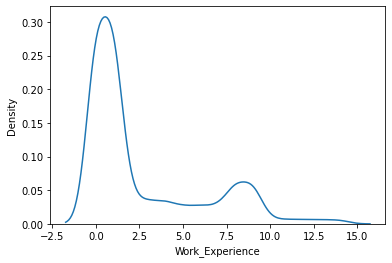

In [46]:
sns.kdeplot(df['Work_Experience'])

In [47]:
df1 = df.copy() ### Savepoint 

In [48]:
df1['Work_Experience'].fillna(df1['Work_Experience'].median(),inplace=True)

In [49]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8068 entries, 0 to 8067
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Gender           8068 non-null   int64  
 1   Ever_Married     8068 non-null   float64
 2   Age              8068 non-null   int64  
 3   Graduated        8068 non-null   float64
 4   Profession       8068 non-null   object 
 5   Work_Experience  8068 non-null   float64
 6   Spending_Score   8068 non-null   object 
 7   Family_Size      7733 non-null   float64
 8   Var_1            7992 non-null   object 
 9   Segmentation     8068 non-null   object 
dtypes: float64(4), int64(2), object(4)
memory usage: 630.4+ KB


In [50]:
df1['Spending_Score']

0           Low
1       Average
2           Low
3          High
4          High
         ...   
8063        Low
8064        Low
8065        Low
8066        Low
8067    Average
Name: Spending_Score, Length: 8068, dtype: object

In [51]:
df1['Spending_Score'].replace({'Low':0, 'Average':1, 'High':2},inplace=True)

In [52]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8068 entries, 0 to 8067
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Gender           8068 non-null   int64  
 1   Ever_Married     8068 non-null   float64
 2   Age              8068 non-null   int64  
 3   Graduated        8068 non-null   float64
 4   Profession       8068 non-null   object 
 5   Work_Experience  8068 non-null   float64
 6   Spending_Score   8068 non-null   int64  
 7   Family_Size      7733 non-null   float64
 8   Var_1            7992 non-null   object 
 9   Segmentation     8068 non-null   object 
dtypes: float64(4), int64(3), object(3)
memory usage: 630.4+ KB


In [53]:
df1['Family_Size']

0       4.0
1       3.0
2       1.0
3       2.0
4       6.0
       ... 
8063    7.0
8064    4.0
8065    1.0
8066    4.0
8067    3.0
Name: Family_Size, Length: 8068, dtype: float64

In [54]:
df1['Family_Size'].isna().sum()

335

In [55]:
df1['Family_Size'].median()

3.0

In [56]:
df1['Family_Size'].fillna(df1['Family_Size'].median(),inplace=True)

In [57]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8068 entries, 0 to 8067
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Gender           8068 non-null   int64  
 1   Ever_Married     8068 non-null   float64
 2   Age              8068 non-null   int64  
 3   Graduated        8068 non-null   float64
 4   Profession       8068 non-null   object 
 5   Work_Experience  8068 non-null   float64
 6   Spending_Score   8068 non-null   int64  
 7   Family_Size      8068 non-null   float64
 8   Var_1            7992 non-null   object 
 9   Segmentation     8068 non-null   object 
dtypes: float64(4), int64(3), object(3)
memory usage: 630.4+ KB


In [59]:
df["Var_1"].value_counts()

Cat_6    5238
Cat_4    1089
Cat_3     822
Cat_2     422
Cat_7     203
Cat_1     133
Cat_5      85
Name: Var_1, dtype: int64

In [60]:
df["Var_1"].unique()

array(['Cat_4', 'Cat_6', 'Cat_7', 'Cat_3', 'Cat_1', 'Cat_2', nan, 'Cat_5'],
      dtype=object)

<AxesSubplot:xlabel='Var_1', ylabel='count'>

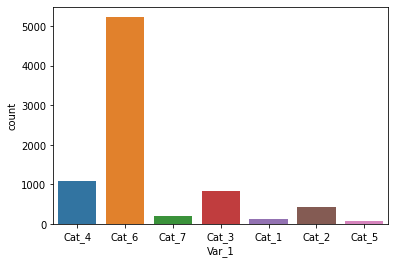

In [61]:
sns.countplot(x= df['Var_1'])

In [62]:
from sklearn.preprocessing import LabelEncoder

In [63]:
lb = LabelEncoder()

In [64]:
lb.fit_transform(df1['Var_1'])

array([3, 3, 5, ..., 5, 5, 3])

In [66]:
df1['Var_1'] = lb.fit_transform(df1['Var_1'])

In [67]:
df1.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8068 entries, 0 to 8067
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Gender           8068 non-null   int64  
 1   Ever_Married     8068 non-null   float64
 2   Age              8068 non-null   int64  
 3   Graduated        8068 non-null   float64
 4   Profession       8068 non-null   object 
 5   Work_Experience  8068 non-null   float64
 6   Spending_Score   8068 non-null   int64  
 7   Family_Size      8068 non-null   float64
 8   Var_1            8068 non-null   int32  
 9   Segmentation     8068 non-null   object 
dtypes: float64(4), int32(1), int64(3), object(2)
memory usage: 598.9+ KB


In [73]:
df1["Segmentation"].value_counts()

D    2268
A    1972
C    1970
B    1858
Name: Segmentation, dtype: int64

In [74]:
df1["Segmentation"]=lb.fit_transform(df1['Segmentation'])

In [75]:
df1["Segmentation"]

0       3
1       0
2       1
3       1
4       0
       ..
8063    3
8064    3
8065    3
8066    1
8067    1
Name: Segmentation, Length: 8068, dtype: int32

In [76]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8068 entries, 0 to 8067
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Gender           8068 non-null   int64  
 1   Ever_Married     8068 non-null   float64
 2   Age              8068 non-null   int64  
 3   Graduated        8068 non-null   float64
 4   Profession       8068 non-null   object 
 5   Work_Experience  8068 non-null   float64
 6   Spending_Score   8068 non-null   int64  
 7   Family_Size      8068 non-null   float64
 8   Var_1            8068 non-null   int32  
 9   Segmentation     8068 non-null   int32  
dtypes: float64(4), int32(2), int64(3), object(1)
memory usage: 567.4+ KB


In [77]:
final_df = pd.concat([df1,df_prof],axis=1)
final_df

,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation,prof_Doctor,prof_Engineer,prof_Entertainment,prof_Executive,prof_Healthcare,prof_Homemaker,prof_Lawyer,prof_Marketing,prof_other
0,1,0.0,22,0.0,Healthcare,1.0,0,4.0,3,3,0,0,0,0,1,0,0,0,0
1,0,1.0,38,1.0,Engineer,1.0,1,3.0,3,0,0,1,0,0,0,0,0,0,0
2,0,1.0,67,1.0,Engineer,1.0,0,1.0,5,1,0,1,0,0,0,0,0,0,0
3,1,1.0,67,1.0,Lawyer,0.0,2,2.0,5,1,0,0,0,0,0,0,1,0,0
4,0,1.0,40,1.0,Entertainment,1.0,2,6.0,5,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8063,1,0.0,22,0.0,other,0.0,0,7.0,0,3,0,0,0,0,0,0,0,0,1
8064,1,0.0,35,0.0,Executive,3.0,0,4.0,3,3,0,0,0,1,0,0,0,0,0
8065,0,0.0,33,1.0,Healthcare,1.0,0,1.0,5,3,0,0,0,0,1,0,0,0,0
8066,0,0.0,27,1.0,Healthcare,1.0,0,4.0,5,1,0,0,0,0,1,0,0,0,0


In [78]:
final_df.drop("Profession",axis=1,inplace=True)

In [79]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8068 entries, 0 to 8067
Data columns (total 18 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Gender              8068 non-null   int64  
 1   Ever_Married        8068 non-null   float64
 2   Age                 8068 non-null   int64  
 3   Graduated           8068 non-null   float64
 4   Work_Experience     8068 non-null   float64
 5   Spending_Score      8068 non-null   int64  
 6   Family_Size         8068 non-null   float64
 7   Var_1               8068 non-null   int32  
 8   Segmentation        8068 non-null   int32  
 9   prof_Doctor         8068 non-null   uint8  
 10  prof_Engineer       8068 non-null   uint8  
 11  prof_Entertainment  8068 non-null   uint8  
 12  prof_Executive      8068 non-null   uint8  
 13  prof_Healthcare     8068 non-null   uint8  
 14  prof_Homemaker      8068 non-null   uint8  
 15  prof_Lawyer         8068 non-null   uint8  
 16  prof_M

# Model Training

In [80]:
x = final_df.drop("Segmentation",axis=1)
y= final_df["Segmentation"]

In [81]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=10, stratify=y)

In [82]:
x_train

,Gender,Ever_Married,Age,Graduated,Work_Experience,Spending_Score,Family_Size,Var_1,prof_Doctor,prof_Engineer,prof_Entertainment,prof_Executive,prof_Healthcare,prof_Homemaker,prof_Lawyer,prof_Marketing,prof_other
440,0,0.0,18,0.0,0.0,0,6.0,5,0,0,0,0,0,0,0,0,1
935,1,0.0,35,1.0,5.0,0,2.0,5,0,0,0,0,0,0,0,0,0
4238,0,1.0,56,1.0,1.0,1,2.0,5,0,0,1,0,0,0,0,0,0
7427,0,0.0,31,1.0,8.0,0,1.0,5,0,0,0,0,0,1,0,0,0
7571,1,0.0,20,0.0,7.0,0,3.0,5,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7740,0,0.0,26,1.0,1.0,0,7.0,1,0,0,0,0,1,0,0,0,0
597,0,1.0,60,0.0,9.0,0,4.0,2,0,0,1,0,0,0,0,0,0
5542,1,0.0,21,0.0,1.0,0,5.0,3,0,0,0,0,1,0,0,0,0
5764,1,1.0,62,1.0,5.0,0,1.0,2,1,0,0,0,0,0,0,0,0


In [83]:
y_train

440     3
935     0
4238    0
7427    3
7571    3
       ..
7740    1
597     1
5542    3
5764    1
5259    2
Name: Segmentation, Length: 6454, dtype: int32

In [84]:
y_test

5254    2
2639    2
224     3
7283    3
6080    2
       ..
6581    3
4427    1
1476    2
7835    1
467     3
Name: Segmentation, Length: 1614, dtype: int32

In [85]:
model = LogisticRegression()
model.fit(x_train,y_train)

C:\Users\DELL\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [86]:
model = LogisticRegression(max_iter=1000)
model.fit(x_train,y_train)

C:\Users\DELL\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(max_iter=1000)

In [87]:
model = LogisticRegression(max_iter=2000)
model.fit(x_train,y_train)

LogisticRegression(max_iter=2000)

## Model Evolution

In [89]:
#### Testing Data Evaluation

y_pred_test = model.predict(x_test)
# y_pred_test

cnf_matrix = confusion_matrix(y_test, y_pred_test)
print(cnf_matrix)


clf_report= classification_report(y_test, y_pred_test)
print(clf_report)

[[194  43  83  74]
 [113  60 150  49]
 [ 58  49 232  55]
 [ 91  14  29 320]]
              precision    recall  f1-score   support

           0       0.43      0.49      0.46       394
           1       0.36      0.16      0.22       372
           2       0.47      0.59      0.52       394
           3       0.64      0.70      0.67       454

    accuracy                           0.50      1614
   macro avg       0.47      0.49      0.47      1614
weighted avg       0.48      0.50      0.48      1614



In [90]:
from sklearn.metrics import multilabel_confusion_matrix

In [91]:
m_cnf_matrix = multilabel_confusion_matrix(y_test, y_pred_test)
print(m_cnf_matrix)

[[[ 958  262]
  [ 200  194]]

 [[1136  106]
  [ 312   60]]

 [[ 958  262]
  [ 162  232]]

 [[ 982  178]
  [ 134  320]]]


In [92]:
model = LogisticRegression(max_iter=2000,multi_class='ovr')
model.fit(x_train,y_train)

LogisticRegression(max_iter=2000, multi_class='ovr')

In [93]:
 ### Testing Data Evaluation

y_pred_test = model.predict(x_test)
# y_pred_test

cnf_matrix = confusion_matrix(y_test, y_pred_test)
print(cnf_matrix)


clf_report= classification_report(y_test, y_pred_test)
print(clf_report)

m_cnf_matrix = multilabel_confusion_matrix(y_test, y_pred_test)
print(m_cnf_matrix)



[[189  31  94  80]
 [119  44 157  52]
 [ 59  32 244  59]
 [ 87  12  30 325]]
              precision    recall  f1-score   support

           0       0.42      0.48      0.45       394
           1       0.37      0.12      0.18       372
           2       0.46      0.62      0.53       394
           3       0.63      0.72      0.67       454

    accuracy                           0.50      1614
   macro avg       0.47      0.48      0.46      1614
weighted avg       0.48      0.50      0.47      1614

[[[ 955  265]
  [ 205  189]]

 [[1167   75]
  [ 328   44]]

 [[ 939  281]
  [ 150  244]]

 [[ 969  191]
  [ 129  325]]]


In [94]:
#### Training Data Evaluation

y_pred_train = model.predict(x_train)
# y_pred_test

cnf_matrix = confusion_matrix(y_train, y_pred_train)
print(cnf_matrix)


clf_report= classification_report(y_train, y_pred_train)
print(clf_report)

m_cnf_matrix = multilabel_confusion_matrix(y_train, y_pred_train)
print(m_cnf_matrix)



[[ 742  141  363  332]
 [ 469  221  631  165]
 [ 223  111 1033  209]
 [ 350   65  110 1289]]
              precision    recall  f1-score   support

           0       0.42      0.47      0.44      1578
           1       0.41      0.15      0.22      1486
           2       0.48      0.66      0.56      1576
           3       0.65      0.71      0.68      1814

    accuracy                           0.51      6454
   macro avg       0.49      0.50      0.47      6454
weighted avg       0.50      0.51      0.48      6454

[[[3834 1042]
  [ 836  742]]

 [[4651  317]
  [1265  221]]

 [[3774 1104]
  [ 543 1033]]

 [[3934  706]
  [ 525 1289]]]
